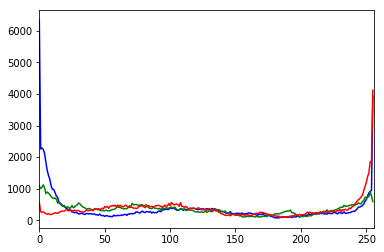

92050.0


In [9]:
import cv2
from matplotlib import pyplot as plt

#img = cv2.imread('bright-flash.jpg', 1)
#img = cv2.imread('flash-blow-out.jpg', 1)
img = cv2.imread('imagen1.jpg', 1)
img_shape = img.shape
height = img_shape[0]
width = img_shape[1]

def histogramaRGB(img):
    color = ('b','g','r')
    aux = []
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        aux.append(histr)
    plt.show()
    return aux

aux=histogramaRGB(img)
print(aux[0].sum())



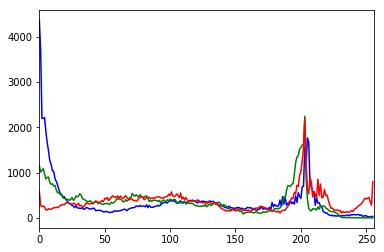

92050.0


In [15]:
import numpy as np
import math

def correccion(img, n):
    canal = 0
    img = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
    img_yuv_aux = img[:,:,canal].copy()
    #print(img_yuv_aux)
    n = math.floor(255-255*n/100)
    #for row in range(width):
    #    for column in range(height):
    #        if img_yuv_aux[column][row] > n:
    #            img_yuv_aux[column][row] = img_yuv_aux[column][row]
    #        else: 
    #            img_yuv_aux[column][row]= 0
    #print(img)
    #img_yuv_aux[:,:] = cv2.equalizeHist(img_yuv_aux[:,:])
    img_yuv_aux = cv2.addWeighted(img_yuv_aux, 0.3, np.zeros(img_yuv_aux.shape, img_yuv_aux.dtype), 0, 127)
    #img_yuv_aux = cv2.GaussianBlur(img_yuv_aux, (7,7), 0)
    #img_yuv_aux = cv2.medianBlur(img_yuv_aux,5)
    #print(img_yuv)
    img_yuv_aux2 = img.copy()
    
    for row in range(width):
        for column in range(height):
            if img[column][row][canal] < n:
                img_yuv_aux2[column][row][canal] = img[column][row][canal]
            else:
                img_yuv_aux2[column][row][canal] = img_yuv_aux[column][row]
                
    hist_equalization_result = cv2.cvtColor(img_yuv_aux2, cv2.COLOR_YUV2BGR)            
    
    return(hist_equalization_result)

aux3 = correccion(img,10)

aux4=histogramaRGB(aux3)
print(aux4[0].sum())

cv2.imshow('titulo', aux3 )
cv2.waitKey(0)
cv2.destroyAllWindows()


